# Inserción en Árbol B

La inserción en un árbol B es una operación crítica que permite añadir nuevos elementos manteniendo el árbol balanceado y sus propiedades intactas. Este proceso se asegura de que el árbol se mantenga en su forma óptima, permitiendo búsquedas, inserciones y eliminaciones eficientes.

- **Proceso de Inserción General:**
  - Comienza en la raíz y busca el lugar adecuado para insertar el nuevo elemento.
  - Si el nodo donde debe insertarse el elemento está lleno, se divide antes de proceder con la inserción.
  - La inserción puede llevar a una cascada de divisiones hacia arriba si es necesario.
- **Consideraciones Específicas:**
  - **Elección del Nodo para División:** Al dividir un nodo, se elige un elemento medio para ascender y ayudar a dividir las claves entre los dos nuevos nodos resultantes.
  - **Manejo de Nodos Hoja vs. Nodos Internos:** La inserción en los nodos hoja es directa una vez encontrado el lugar adecuado. Para los nodos internos, puede requerirse buscar el nodo hijo adecuado para insertar la nueva clave.

## Implementación en Python

In [16]:
# Código utilitario
from src.visualization import visualize_b_tree

Este código define una clase BTreeNode para los nodos del árbol B y una clase BTree para el árbol en sí. La clase BTree incluye métodos para insertar nuevos elementos y para dividir nodos que exceden el número máximo de claves permitidas. La inserción comienza verificando si el nodo raíz está lleno; si lo está, el árbol se reestructura antes de insertar el nuevo elemento. El proceso de inserción respeta las propiedades de los árboles B, asegurando que el árbol se mantenga balanceado.

## Pruebas de Inserción

Para probar la inserción en el árbol B, insertaremos varios elementos y luego visualizaremos el árbol para asegurarnos de que la estructura sea la esperada. Usaremos el módulo de visualización que tienes disponible para ver cómo los elementos se distribuyen a través del árbol después de sus inserciones.

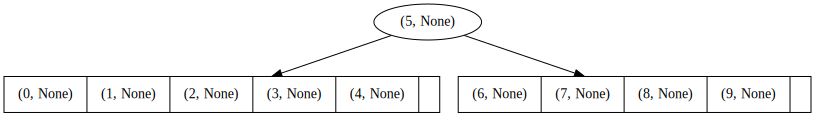

In [18]:
# Crear una instancia del árbol B con grado mínimo 3
b_tree = BTree(3)

# Insertar elementos en el árbol
elements = [3, 7, 9, 1, 5, 2, 8, 4, 6, 0]
for element in elements:
    b_tree.insert(element)

# Visualizar el árbol B después de las inserciones
dot = visualize_b_tree(b_tree.root)
display(dot)

## Complejidad del Algoritmo

La complejidad de la inserción en un árbol B depende de la altura del árbol. En el peor caso, puede ser necesario dividir los nodos en cada nivel desde la hoja hasta la raíz, lo que da una complejidad de tiempo O(log n), donde n es el número de claves en el árbol. La complejidad del espacio es O(1), ya que solo se requiere un espacio constante adicional durante la inserción, más allá del almacenamiento de los propios elementos del árbol.

## Ejercicios Prácticos

1. **Insertar y Eliminar:** Después de realizar una serie de inserciones, realiza varias eliminaciones, y luego visualiza el árbol para comprender cómo afectan las eliminaciones a su estructura.
2. **Búsqueda de Elementos:** Implementa una función de búsqueda que verifique si un elemento está presente en el árbol B. Utiliza esta función para buscar varios elementos e imprime los resultados.